# VENN DIAGRAM CREATION

In [1]:
import pandas as pd

nevo = pd.read_csv("../../nicekg_processing/data/graph_input/nevo21_rdflib_ready.csv")
nevo = nevo[["Engelse naam/Food name", "nevo_foodon_iri"]].rename({"nevo_foodon_iri":"foodon_iri", "Engelse naam/Food name": "nevo_name"}, axis = 1)

kap = pd.read_csv("../../nicekg_processing/data/graph_input/kap_rdflib_ready.csv")
kap = kap[["pro_name_engels", "foodon_iri"]].rename({"pro_name_engels":"kap_name"}, axis =1)

lca = pd.read_csv("../../nicekg_processing/data/graph_input/lca_rdflib_ready.csv")
lca = lca[["food_product", "lca_foodon_iri"]].rename({"lca_foodon_iri":"foodon_iri", "food_product":"lca_name"}, axis = 1)

leda = pd.read_csv("../../nicekg_processing/data/graph_input/leda_foods_rdf_ready.csv") 
leda = leda[["ingredient_english","foodon_iri"]].rename({"ingredient_english":"ingredient_name"}, axis =1)

Plot saved as /home/bindtf/my_biogrid/publication_1/development/figures_revision/Figure_3.svg


{'kap': {'http://purl.obolibrary.org/obo/FOODON_00001008',
  'http://purl.obolibrary.org/obo/FOODON_00001016',
  'http://purl.obolibrary.org/obo/FOODON_00001038',
  'http://purl.obolibrary.org/obo/FOODON_00001059',
  'http://purl.obolibrary.org/obo/FOODON_00001131',
  'http://purl.obolibrary.org/obo/FOODON_00001134',
  'http://purl.obolibrary.org/obo/FOODON_00001138',
  'http://purl.obolibrary.org/obo/FOODON_00001140',
  'http://purl.obolibrary.org/obo/FOODON_00001141',
  'http://purl.obolibrary.org/obo/FOODON_00001143',
  'http://purl.obolibrary.org/obo/FOODON_00001186',
  'http://purl.obolibrary.org/obo/FOODON_00001194',
  'http://purl.obolibrary.org/obo/FOODON_00001230',
  'http://purl.obolibrary.org/obo/FOODON_00001663',
  'http://purl.obolibrary.org/obo/FOODON_00001691',
  'http://purl.obolibrary.org/obo/FOODON_00001745',
  'http://purl.obolibrary.org/obo/FOODON_00001750',
  'http://purl.obolibrary.org/obo/FOODON_00001799',
  'http://purl.obolibrary.org/obo/FOODON_00001805',
  'ht

<Figure size 400x400 with 0 Axes>

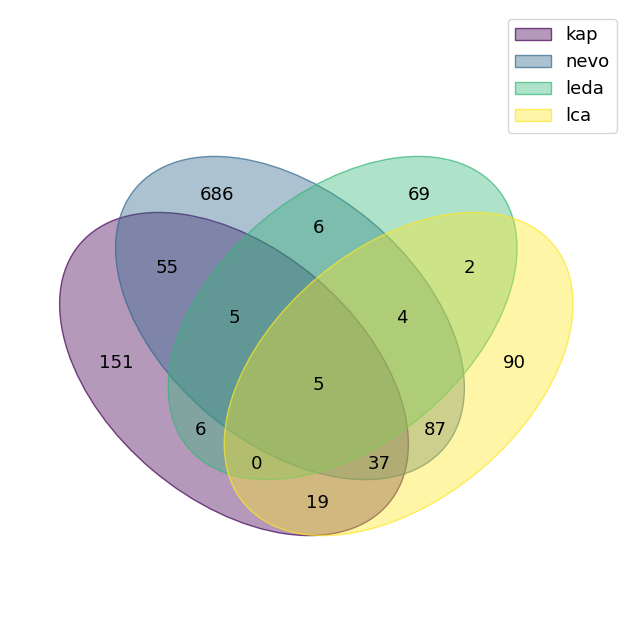

In [3]:
# Would it be possible to make a rule that items that are only x-apart from each other can be integrated 
from functions.vis_helper import plot_four_set_venn

sets_iri = {
    'kap': set(kap["foodon_iri"].dropna()),
    'nevo': set(nevo["foodon_iri"].dropna()),
    'leda': set(leda["foodon_iri"].dropna()),
    'lca': set(lca["foodon_iri"].dropna()) #was already manually checked
}

plot_four_set_venn(sets_iri, format = "svg",  save_path="/home/bindtf/my_biogrid/publication_1/development/figures_revision/Figure_3.svg", border=True)
# plot_four_set_venn_percent(sets_iri, save_path="/data/BioGrid/bindtf/publication_1/development/figures_revision/venn_diagram_percent.png", border=True)  # len(sets_iri["kap"] | sets_iri["leda"] | sets_iri["nevo"] | sets_iri["lca"])

sets_iri



In [3]:
all_iri = set(nevo["foodon_iri"].dropna()) | set(leda["foodon_iri"].dropna()) | set(kap["foodon_iri"].dropna()) | set(lca["foodon_iri"].dropna())  
print("total iri", len(all_iri))

items_filled = set(lca[["lca_name", "foodon_iri"]].dropna()["lca_name"].str.lower()) | set(nevo[["nevo_name", "foodon_iri"]].dropna()["nevo_name"].str.lower()) | set(kap[["kap_name", "foodon_iri"]].dropna()["kap_name"].str.lower()) | set(leda[["ingredient_name", "foodon_iri"]].dropna()["ingredient_name"].str.lower()) 
print("total annotated food items", len( items_filled))

all_items_considered = set(lca[["lca_name"]].dropna()["lca_name"].str.lower()) | set(nevo[["nevo_name"]].dropna()["nevo_name"].str.lower()) | set(kap[["kap_name"]].dropna()["kap_name"].str.lower()) | set(leda[["ingredient_name"]].dropna()["ingredient_name"].str.lower())
print("total food items over all datasets", len( all_items_considered))

missed_items =  set(lca[lca["foodon_iri"].isna()]["lca_name"]) | set(leda[leda["foodon_iri"].isna()]["ingredient_name"]) | set(nevo[nevo["foodon_iri"].isna()]["nevo_name"]) | set(kap[kap["foodon_iri"].isna()]["kap_name"])
print("total of missed items", len( missed_items))

print(len(missed_items) +  len( items_filled))

# It is important to notice that some of the food items have multiple annotations explaining the imbalance in these numbers, and the numbers presented in the paper. 

total iri 1222
total annotated food items 1956
total food items over all datasets 2445
total of missed items 490
2446


In [4]:
# Check how many foods and annotations of each dataset are included

print("leda",len(leda["ingredient_name"].dropna().unique()))
print("leda",len(leda["foodon_iri"].dropna().unique()))

print("nevo", len(nevo["nevo_name"].dropna().unique()))
print("nevo", len(nevo["foodon_iri"].dropna().unique()))

print("lca", len(lca["lca_name"].dropna().unique()))
print("lca", len(lca["foodon_iri"].dropna().unique()))

print("kap", len(kap["kap_name"].dropna().unique()))
print("kap", len(kap["foodon_iri"].dropna().unique()))

leda 132
leda 97


nevo 1657
nevo 885
lca 350
lca 244
kap 342
kap 278
